In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...


True

In [2]:
#df = pd.read_excel (r'Path where the Excel file is stored\File name.xlsx')
df = pd.read_csv (r'C:/Users/USER/Desktop/Machine_learning/Tweets-Project/Data/Tweets-Data/tweets.csv')
# adding an row_id field to the dataframe, which will be useful for joining later
df["row_id"] = df.index + 1
#print first 10 rows 
print (df.head(10))

     id        hashtag_generation_time              searched_hashtag  \
0  7549  2022-08-26 13:56:37.490901+00  CBI Unfold D Truth InSSRCase   
1  6327  2022-08-26 13:54:52.480426+00  CBI Unfold D Truth InSSRCase   
2  6328  2022-08-26 13:54:52.618819+00  CBI Unfold D Truth InSSRCase   
3  6329  2022-08-26 13:54:52.656809+00  CBI Unfold D Truth InSSRCase   
4  6330  2022-08-26 13:54:52.696796+00  CBI Unfold D Truth InSSRCase   
5  6331  2022-08-26 13:54:52.737801+00  CBI Unfold D Truth InSSRCase   
6  6332  2022-08-26 13:54:52.796806+00  CBI Unfold D Truth InSSRCase   
7  6333  2022-08-26 13:54:52.837799+00  CBI Unfold D Truth InSSRCase   
8  6345  2022-08-26 13:54:54.345522+00  CBI Unfold D Truth InSSRCase   
9  6334  2022-08-26 13:54:52.881808+00  CBI Unfold D Truth InSSRCase   

              tweet_id        tweet_created_at     screen_name  \
0  1563158353391779844  2022-08-26 13:36:08+00        ATUL7735   
1  1563163059002101762  2022-08-26 13:54:50+00    BabyPink1803   
2  156316

In [5]:
#create a new data frame with "id" and "comment" fields
df_subset = df[['row_id', 'tweet']].copy()
#data clean-up
#remove all non-aphabet characters
df_subset['tweet'] = df_subset['tweet'].str.replace("[^a-zA-Z#]", " ")
#covert to lower-case
df_subset['tweet'] = df_subset['tweet'].str.casefold()
print (df_subset.head(10))

   row_id                                              tweet
0       1  rt  privin     divine  ssr  atul     thanks a ...
1       2  rt  keesain    cbi unfold d truth inssrcase   ...
2       3  rt  chintujainhs   satyassrian   pmoindia  dop...
3       4  rt  sushfanseg  why rhea chakraborty s custodi...
4       5  rt  manisha        satyassrian   pmoindia  dop...
5       6  rt  carmiemonsang     ashutoshsureka  alkesham...
6       7  rt  purnimasengup     satyassrian   pmoindia  ...
7       8  rt  ssrkafan  sushant family and fans are wait...
8       9  rt  dharmap          cbi unfold d truth inssrcase
9      10  rt  its gautamrinee   satyassrian   pmoindia  ...


C:\Users\USER\AppData\Local\Temp\ipykernel_2484\3268682768.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df_subset['tweet'] = df_subset['tweet'].str.replace("[^a-zA-Z#]", " ")


In [6]:
# set up empty dataframe for staging output
df1=pd.DataFrame()
df1['row_id']=['99999999999']
df1['sentiment_type']='NA999NA'
df1['sentiment_score']=0

In [7]:
print('Processing sentiment analysis...')
sid = SentimentIntensityAnalyzer()
t_df = df1
for index, row in df_subset.iterrows():
    scores = sid.polarity_scores(row[1])
    for key, value in scores.items():
        temp = [key,value,row[0]]
        df1['row_id']=row[0]
        df1['sentiment_type']=key
        df1['sentiment_score']=value
        t_df=t_df.append(df1)
#remove dummy row with row_id = 99999999999
t_df_cleaned = t_df[t_df.row_id != '99999999999']
#remove duplicates if any exist
t_df_cleaned = t_df_cleaned.drop_duplicates()
# only keep rows where sentiment_type = compound
t_df_cleaned = t_df[t_df.sentiment_type == 'compound']
print(t_df_cleaned.head(10))

Processing sentiment analysis...


C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

   row_id sentiment_type  sentiment_score
0       1       compound           0.9531
0       2       compound           0.7906
0       3       compound           0.3182
0       4       compound           0.3182
0       5       compound           0.3182
0       6       compound           0.0000
0       7       compound           0.3182
0       8       compound           0.3182
0       9       compound           0.3182
0      10       compound           0.3182


C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t_df=t_df.append(df1)
C:\Users\USER\AppData\Local\Temp\ipykernel_2484\2795772515.py:11: FutureWarning: The frame.append method is 

In [8]:
#merge dataframes
df_output = pd.merge(df, t_df_cleaned, on='row_id', how='inner')
print(df_output.head(10))

     id        hashtag_generation_time              searched_hashtag  \
0  7549  2022-08-26 13:56:37.490901+00  CBI Unfold D Truth InSSRCase   
1  6327  2022-08-26 13:54:52.480426+00  CBI Unfold D Truth InSSRCase   
2  6328  2022-08-26 13:54:52.618819+00  CBI Unfold D Truth InSSRCase   
3  6329  2022-08-26 13:54:52.656809+00  CBI Unfold D Truth InSSRCase   
4  6330  2022-08-26 13:54:52.696796+00  CBI Unfold D Truth InSSRCase   
5  6331  2022-08-26 13:54:52.737801+00  CBI Unfold D Truth InSSRCase   
6  6332  2022-08-26 13:54:52.796806+00  CBI Unfold D Truth InSSRCase   
7  6333  2022-08-26 13:54:52.837799+00  CBI Unfold D Truth InSSRCase   
8  6345  2022-08-26 13:54:54.345522+00  CBI Unfold D Truth InSSRCase   
9  6334  2022-08-26 13:54:52.881808+00  CBI Unfold D Truth InSSRCase   

              tweet_id        tweet_created_at     screen_name  \
0  1563158353391779844  2022-08-26 13:36:08+00        ATUL7735   
1  1563163059002101762  2022-08-26 13:54:50+00    BabyPink1803   
2  156316

In [9]:
df_output[["sentiment_score"]].describe()

sentiment_score
count      5232.000000
mean          0.062906
std           0.492259
min          -0.966800
25%          -0.346800
50%           0.077200
75%           0.381800
max           0.975000

<AxesSubplot:title={'center':'Sentiment Score'}, xlabel='tweet_created_at', ylabel='Mean Sentiment Score'>

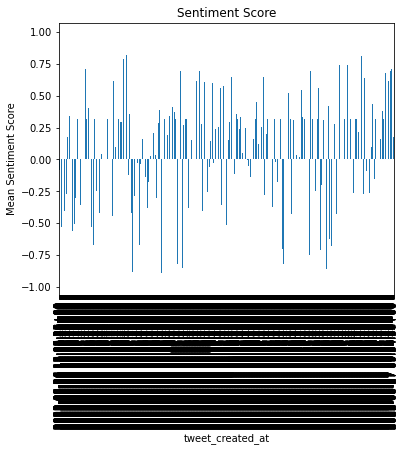

In [11]:
#generate mean of sentiment_score by period
dfg = df_output.groupby(['tweet_created_at'])['sentiment_score'].mean()
#create a bar plot
dfg.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='tweet_created_at', figsize=(6, 5))

<AxesSubplot:title={'center':'sentiment_score'}, xlabel='retweet_count', ylabel='Mean Sentiment Score'>

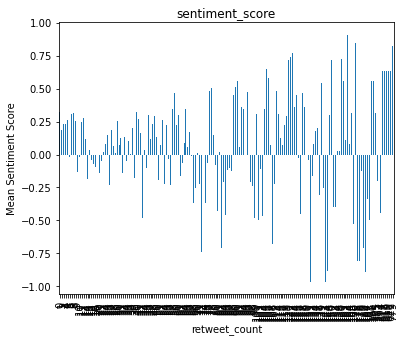

In [12]:
dfg = df_output.groupby(['retweet_count'])['sentiment_score'].mean()
dfg.plot(kind='bar', title='sentiment_score', ylabel='Mean Sentiment Score',
         xlabel='retweet_count', figsize=(6, 5))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169]),
 [Text(0, 0, '0'),
  Text(1, 0, '1')

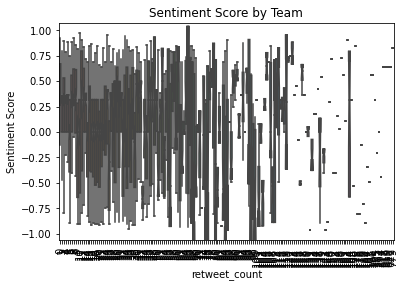

In [13]:
import seaborn as sns
#create seaborn boxplots by group
sns.boxplot(x='retweet_count', y='sentiment_score', notch = True,
            data=df_output, showfliers=False).set(title='Sentiment Score by Team')
#modify axis labels
plt.xlabel('retweet_count')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=90)